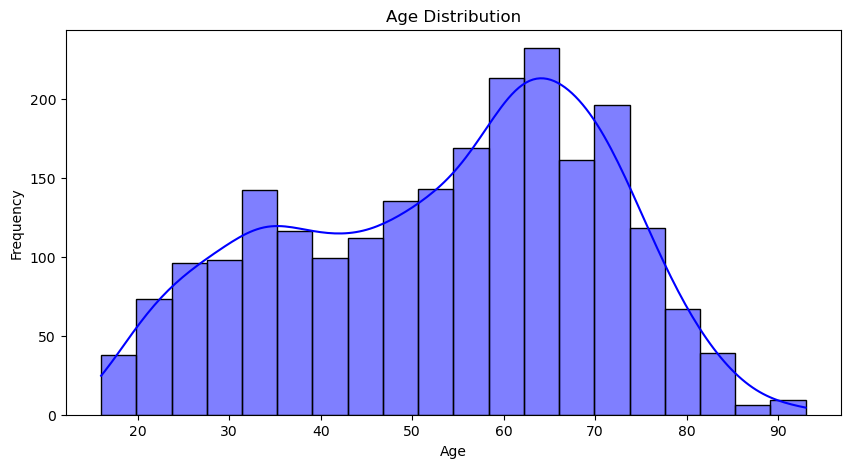

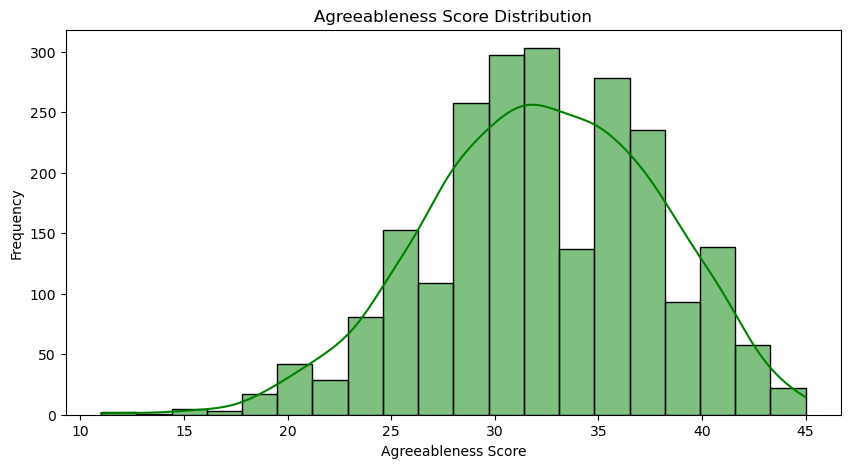

Correlation Coefficient: 0.22871045587141015
P-value: 3.1321890241040827e-28


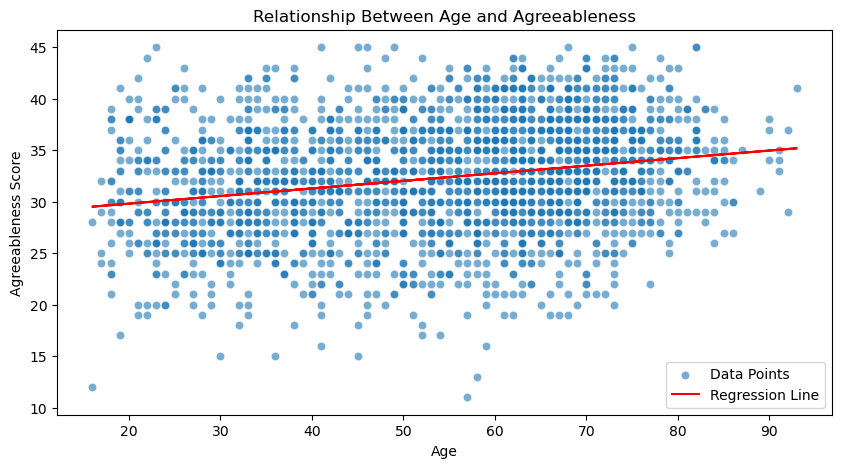

Regression Model:
Intercept: 28.333980506685464
Slope: 0.0736631524071723


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update with the correct path if necessary
dataset = pd.read_csv(file_path, low_memory=False)

# Select relevant columns for analysis
analysis_data = dataset[['DEMO_age', 'PSYCH_big_five_inventory_agreeable_score']].dropna()

# 1. Visualize the distributions of age and agreeableness
# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(analysis_data['DEMO_age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Agreeableness distribution
plt.figure(figsize=(10, 5))
sns.histplot(analysis_data['PSYCH_big_five_inventory_agreeable_score'], kde=True, bins=20, color='green')
plt.title('Agreeableness Score Distribution')
plt.xlabel('Agreeableness Score')
plt.ylabel('Frequency')
plt.show()

# 2. Compute correlation
corr_coeff, p_value = pearsonr(
    analysis_data['DEMO_age'], analysis_data['PSYCH_big_five_inventory_agreeable_score']
)

print(f"Correlation Coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

# 3. Fit a simple linear regression model
X = analysis_data['DEMO_age'].values.reshape(-1, 1)
y = analysis_data['PSYCH_big_five_inventory_agreeable_score']
reg_model = LinearRegression()
reg_model.fit(X, y)
y_pred = reg_model.predict(X)

# 4. Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=analysis_data['DEMO_age'],
    y=analysis_data['PSYCH_big_five_inventory_agreeable_score'],
    alpha=0.6,
    label='Data Points',
)
plt.plot(analysis_data['DEMO_age'], y_pred, color='red', label='Regression Line')
plt.title('Relationship Between Age and Agreeableness')
plt.xlabel('Age')
plt.ylabel('Agreeableness Score')
plt.legend()
plt.show()

# 5. Display regression coefficients
print("Regression Model:")
print(f"Intercept: {reg_model.intercept_}")
print(f"Slope: {reg_model.coef_[0]}")


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update with the correct file path
dataset = pd.read_csv(file_path, low_memory=False)

# Inspect the selected columns for issues
selected_columns = [
    'WELLNESS_subjective_happiness_scale_score', 
    'DEMO_age', 
    'DEMO_gender', 
    'PSYCH_big_five_inventory_extraverted_score', 
    'PSYCH_big_five_inventory_neurotic_score'
]

# Filter the dataset to include only these columns
happiness_data = dataset[selected_columns]

# Check for missing values in each column
print("Missing Values per Column:")
print(happiness_data.isnull().sum())

# Display unique values for the `DEMO_gender` column
print("\nUnique Values in DEMO_gender:")
print(happiness_data['DEMO_gender'].unique())

# Check if encoding might introduce issues
happiness_data['DEMO_gender_encoded'] = happiness_data['DEMO_gender'].astype('category').cat.codes
print("\nUnique Values in Encoded Gender Column:")
print(happiness_data['DEMO_gender_encoded'].unique())

# Check the shape of the data after dropping rows with missing values
happiness_data_cleaned = happiness_data.dropna()
print("\nShape of Data after Dropping Missing Values:")
print(happiness_data_cleaned.shape)

# Inspect the first few rows of the cleaned dataset
print("\nCleaned Data Preview:")
print(happiness_data_cleaned.head())


Missing Values per Column:
WELLNESS_subjective_happiness_scale_score     7826
DEMO_age                                      1211
DEMO_gender                                   3417
PSYCH_big_five_inventory_extraverted_score    9151
PSYCH_big_five_inventory_neurotic_score       9171
dtype: int64

Unique Values in DEMO_gender:
['Non-binary' 'Woman' 'Man' nan 'Presented but no response'
 'Non-binary (including those identifying as Two Spirit, agender, genderfluid, genderqueer, or with another term)']

Unique Values in Encoded Gender Column:
[ 1  4  0 -1  3  2]

Shape of Data after Dropping Missing Values:
(0, 6)

Cleaned Data Preview:
Empty DataFrame
Columns: [WELLNESS_subjective_happiness_scale_score, DEMO_age, DEMO_gender, PSYCH_big_five_inventory_extraverted_score, PSYCH_big_five_inventory_neurotic_score, DEMO_gender_encoded]
Index: []


/tmp/ipykernel_70/1878814451.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_data['DEMO_gender_encoded'] = happiness_data['DEMO_gender'].astype('category').cat.codes


In [8]:
# Check the shape of input data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Preview the data to check for unexpected issues
print("\nFirst few rows of X:")
print(X.head())

print("\nFirst few rows of y:")
print(y.head())

# Check for missing or invalid values in the input predictors
print("\nSummary of Missing Values in Predictors:")
print(X.isnull().sum())

print("\nSummary Statistics of Predictors:")
print(X.describe())


Shape of X: (0, 4)
Shape of y: (0,)

First few rows of X:
Empty DataFrame
Columns: [DEMO_age, DEMO_gender_encoded, PSYCH_big_five_inventory_extraverted_score, PSYCH_big_five_inventory_neurotic_score]
Index: []

First few rows of y:
Series([], Name: WELLNESS_subjective_happiness_scale_score, dtype: float64)

Summary of Missing Values in Predictors:
DEMO_age                                      0
DEMO_gender_encoded                           0
PSYCH_big_five_inventory_extraverted_score    0
PSYCH_big_five_inventory_neurotic_score       0
dtype: int64

Summary Statistics of Predictors:
       DEMO_age  DEMO_gender_encoded  \
count       0.0                  0.0   
mean        NaN                  NaN   
std         NaN                  NaN   
min         NaN                  NaN   
25%         NaN                  NaN   
50%         NaN                  NaN   
75%         NaN                  NaN   
max         NaN                  NaN   

       PSYCH_big_five_inventory_extraverted_score

Intercept: 4.011808418596191
Coefficient for Age: 0.010414792914965222


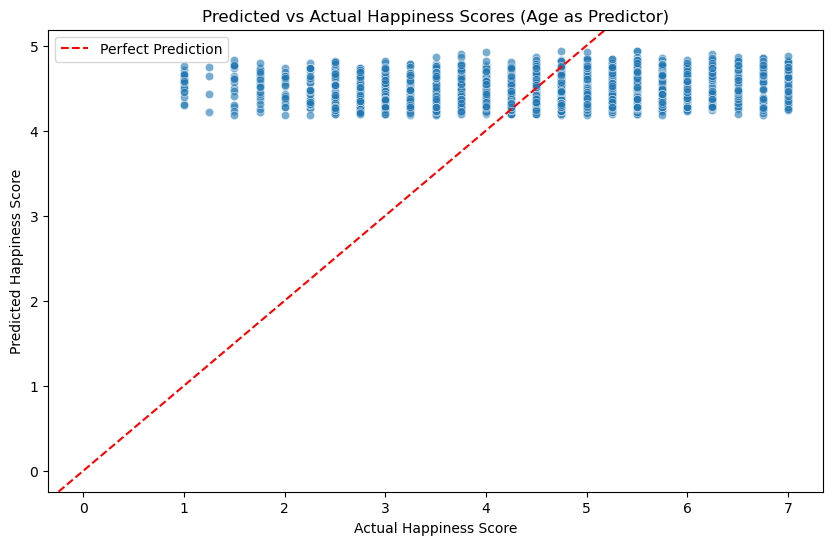

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update the file path if needed
dataset = pd.read_csv(file_path, low_memory=False)

# Focus on happiness score and age
happiness_data_age = dataset[['WELLNESS_subjective_happiness_scale_score', 'DEMO_age']].dropna()

# Define input (X) and output (y) variables
X_age = happiness_data_age[['DEMO_age']]
y_age = happiness_data_age['WELLNESS_subjective_happiness_scale_score']

# Fit a linear regression model using age as the predictor
reg_model_age = LinearRegression()
reg_model_age.fit(X_age, y_age)

# Extract regression coefficients
print("Intercept:", reg_model_age.intercept_)
print("Coefficient for Age:", reg_model_age.coef_[0])

# Generate predictions for visualization
y_pred_age = reg_model_age.predict(X_age)

# Scatter plot of predicted vs actual happiness scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_age, y=y_pred_age, alpha=0.6)
plt.title('Predicted vs Actual Happiness Scores (Age as Predictor)')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Prediction")
plt.legend()
plt.show()

Intercept: 0.10173315863012178
                                        Feature  Coefficient
0                                      DEMO_age     0.014757
1                           DEMO_gender_encoded     0.017666
2    PSYCH_big_five_inventory_extraverted_score     0.099403
3  PSYCH_big_five_inventory_conscientious_score     0.090056


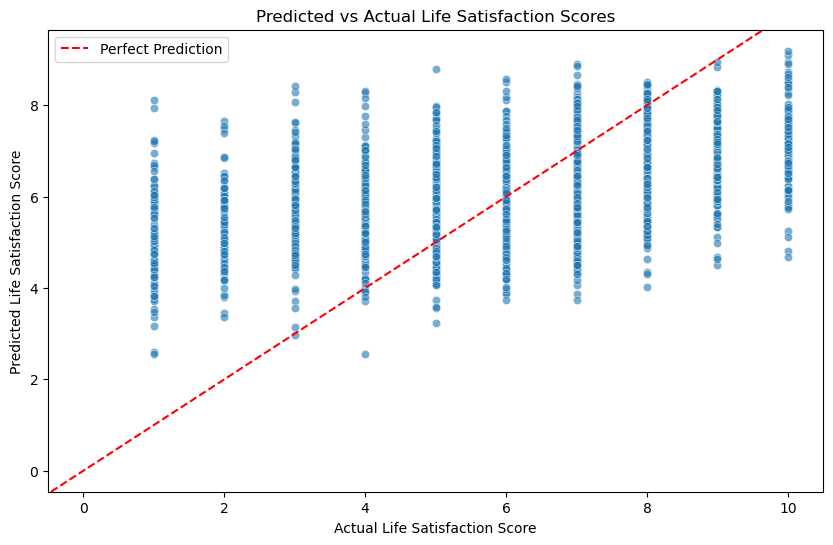

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update the correct file path
dataset = pd.read_csv(file_path, low_memory=False)

# Define dependent variable and predictors
dependent_variable = "WELLNESS_life_satisfaction"
selected_predictors = [
    "DEMO_age", 
    "DEMO_gender", 
    "PSYCH_big_five_inventory_extraverted_score", 
    "PSYCH_big_five_inventory_conscientious_score"
]

# Filter dataset for valid rows
life_satisfaction_data = dataset[[dependent_variable] + selected_predictors].dropna()

# Encode categorical variable 'DEMO_gender'
life_satisfaction_data["DEMO_gender_encoded"] = (
    life_satisfaction_data["DEMO_gender"].astype("category").cat.codes
)
selected_predictors = [col if col != "DEMO_gender" else "DEMO_gender_encoded" for col in selected_predictors]

# Define input (X) and output (y) variables
X_satisfaction = life_satisfaction_data[selected_predictors]
y_satisfaction = life_satisfaction_data[dependent_variable]

# Fit a linear regression model
reg_model_satisfaction = LinearRegression()
reg_model_satisfaction.fit(X_satisfaction, y_satisfaction)

# Extract regression coefficients
coefficients_satisfaction = pd.DataFrame({
    "Feature": selected_predictors,
    "Coefficient": reg_model_satisfaction.coef_
})
print("Intercept:", reg_model_satisfaction.intercept_)
print(coefficients_satisfaction)

# Generate predictions for visualization
y_pred_satisfaction = reg_model_satisfaction.predict(X_satisfaction)

# Scatter plot of predicted vs actual life satisfaction scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_satisfaction, y=y_pred_satisfaction, alpha=0.6)
plt.title('Predicted vs Actual Life Satisfaction Scores')
plt.xlabel('Actual Life Satisfaction Score')
plt.ylabel('Predicted Life Satisfaction Score')
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Prediction")
plt.legend()
plt.show()

R-squared value: 0.213
The predictors weakly explain the variance in life satisfaction.
Intercept: 0.10173315863012178
                                        Feature  Coefficient
0                                      DEMO_age     0.014757
1                           DEMO_gender_encoded     0.017666
2    PSYCH_big_five_inventory_extraverted_score     0.099403
3  PSYCH_big_five_inventory_conscientious_score     0.090056


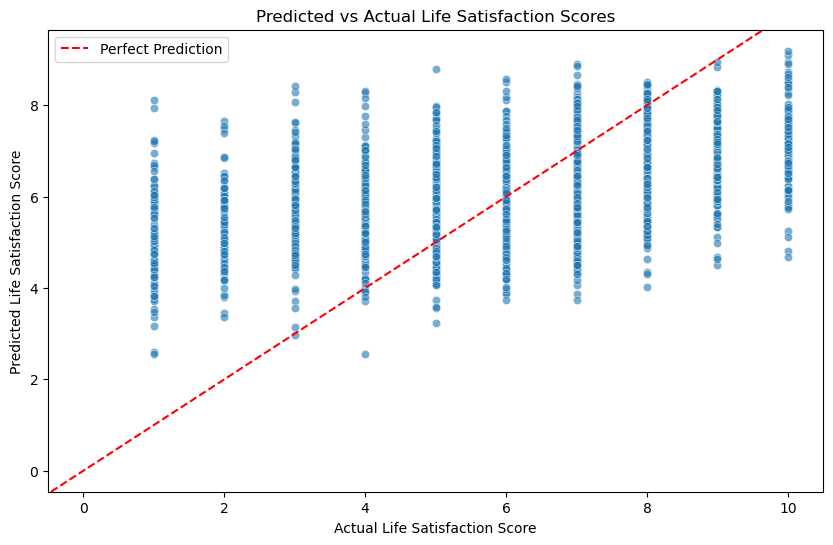

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update with the correct file path
dataset = pd.read_csv(file_path, low_memory=False)

# Define dependent variable and predictors
dependent_variable = "WELLNESS_life_satisfaction"
selected_predictors = [
    "DEMO_age", 
    "DEMO_gender", 
    "PSYCH_big_five_inventory_extraverted_score", 
    "PSYCH_big_five_inventory_conscientious_score"
]

# Filter dataset for valid rows
life_satisfaction_data = dataset[[dependent_variable] + selected_predictors].dropna()

# Encode categorical variable 'DEMO_gender'
life_satisfaction_data["DEMO_gender_encoded"] = (
    life_satisfaction_data["DEMO_gender"].astype("category").cat.codes
)
selected_predictors = [col if col != "DEMO_gender" else "DEMO_gender_encoded" for col in selected_predictors]

# Define input (X) and output (y) variables
X_satisfaction = life_satisfaction_data[selected_predictors]
y_satisfaction = life_satisfaction_data[dependent_variable]

# Fit a linear regression model
reg_model_satisfaction = LinearRegression()
reg_model_satisfaction.fit(X_satisfaction, y_satisfaction)

# Calculate R-squared value
r_squared = reg_model_satisfaction.score(X_satisfaction, y_satisfaction)

# Interpret R-squared
print(f"R-squared value: {r_squared:.3f}")
if r_squared > 0.7:
    print("The predictors strongly explain the variance in life satisfaction.")
elif r_squared > 0.3:
    print("The predictors moderately explain the variance in life satisfaction.")
else:
    print("The predictors weakly explain the variance in life satisfaction.")

# Extract regression coefficients
coefficients_satisfaction = pd.DataFrame({
    "Feature": selected_predictors,
    "Coefficient": reg_model_satisfaction.coef_
})
print("Intercept:", reg_model_satisfaction.intercept_)
print(coefficients_satisfaction)

# Generate predictions for visualization
y_pred_satisfaction = reg_model_satisfaction.predict(X_satisfaction)

# Scatter plot of predicted vs actual life satisfaction scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_satisfaction, y=y_pred_satisfaction, alpha=0.6)
plt.title('Predicted vs Actual Life Satisfaction Scores')
plt.xlabel('Actual Life Satisfaction Score')
plt.ylabel('Predicted Life Satisfaction Score')
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Prediction")
plt.legend()
plt.show()


Unique values in CONNECTION_meaningful_interactions:
[5 2 1 0 4 6 7 3]
Unique values in CONNECTION_activities_talked_day_p3m:
[7 1 2 0 4 3 5 6]
Unique values in CONNECTION_activities_walk_p3m:
[7 2 0 5 3 1 4 6]
Unique values in CONNECTION_activities_group_video_chat_p3m:
[1 5 3 0 7 4 2 6]
R-squared value: 0.017
Intercept: 6.821397950907014
                                      Feature  Coefficient
0          CONNECTION_meaningful_interactions    -0.104345
1        CONNECTION_activities_talked_day_p3m     0.001596
2              CONNECTION_activities_walk_p3m    -0.061554
3  CONNECTION_activities_group_video_chat_p3m    -0.072127


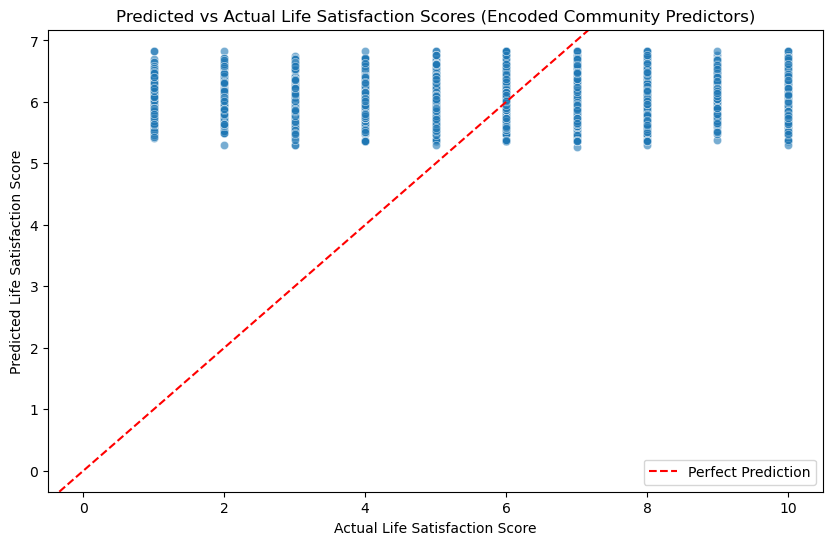

In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update the correct file path
dataset = pd.read_csv(file_path, low_memory=False)

# Define dependent variable and community engagement predictors
dependent_variable = "WELLNESS_life_satisfaction"
community_engagement_predictors = [
    "CONNECTION_meaningful_interactions",
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_walk_p3m",
    "CONNECTION_activities_group_video_chat_p3m"
]

# Identify non-numeric predictors
for predictor in community_engagement_predictors:
    print(f"Unique values in {predictor}:")
    print(community_satisfaction_data[predictor].unique())

# Convert categorical predictors to numeric using label encoding
for predictor in community_engagement_predictors:
    if community_satisfaction_data[predictor].dtype == "object":
        community_satisfaction_data[predictor] = (
            community_satisfaction_data[predictor].astype("category").cat.codes
        )

# Redefine input (X) and output (y) variables after encoding
X_community_encoded = community_satisfaction_data[community_engagement_predictors]
y_community_encoded = community_satisfaction_data[dependent_variable]

# Fit a new linear regression model
reg_model_community_encoded = LinearRegression()
reg_model_community_encoded.fit(X_community_encoded, y_community_encoded)

# Calculate R-squared value
r_squared_community_encoded = reg_model_community_encoded.score(X_community_encoded, y_community_encoded)
print(f"R-squared value: {r_squared_community_encoded:.3f}")

# Extract regression coefficients
coefficients_community_encoded = pd.DataFrame({
    "Feature": community_engagement_predictors,
    "Coefficient": reg_model_community_encoded.coef_
})
print("Intercept:", reg_model_community_encoded.intercept_)
print(coefficients_community_encoded)

# Scatter plot of predicted vs actual life satisfaction scores
y_pred_community_encoded = reg_model_community_encoded.predict(X_community_encoded)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_community_encoded, y=y_pred_community_encoded, alpha=0.6)
plt.title('Predicted vs Actual Life Satisfaction Scores (Encoded Community Predictors)')
plt.xlabel('Actual Life Satisfaction Score')
plt.ylabel('Predicted Life Satisfaction Score')
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Prediction")
plt.legend()
plt.show()


Unique values in CONNECTION_meaningful_interactions:
['Once or twice a week' 'Many times a week' 'Many times a day' 'Every day'
 'Once or twice a month' 'Once or twice a year'
 'Presented but no response' 'Never']
Unique values in CONNECTION_activities_talked_day_p3m:
['Weekly' 'A few times a week' 'Daily or almost daily'
 'A few times a month' 'Monthly' 'Less than monthly'
 'Not in the past three months' 'Presented but no response']
Unique values in CONNECTION_activities_walk_p3m:
['Weekly' 'Daily or almost daily' 'A few times a month'
 'Not in the past three months' 'Less than monthly' 'A few times a week'
 'Monthly' 'Presented but no response']
Unique values in CONNECTION_activities_group_video_chat_p3m:
['A few times a week' 'Not in the past three months' 'Less than monthly'
 'A few times a month' 'Weekly' 'Monthly' 'Daily or almost daily'
 'Presented but no response']
R-squared value: 0.017
Intercept: 6.821397950907014
                                      Feature  Coefficient
0  

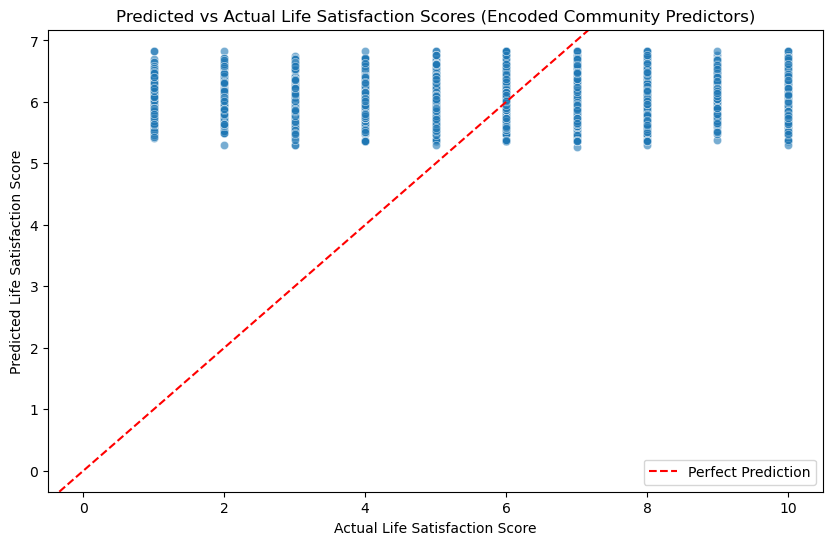

In [22]:
# Identify non-numeric predictors
for predictor in community_engagement_predictors:
    print(f"Unique values in {predictor}:")
    print(community_satisfaction_data[predictor].unique())

# Convert categorical predictors to numeric using label encoding
for predictor in community_engagement_predictors:
    if community_satisfaction_data[predictor].dtype == "object":
        community_satisfaction_data[predictor] = (
            community_satisfaction_data[predictor].astype("category").cat.codes
        )

# Redefine input (X) and output (y) variables after encoding
X_community_encoded = community_satisfaction_data[community_engagement_predictors]
y_community_encoded = community_satisfaction_data[dependent_variable]

# Fit a new linear regression model
reg_model_community_encoded = LinearRegression()
reg_model_community_encoded.fit(X_community_encoded, y_community_encoded)

# Calculate R-squared value
r_squared_community_encoded = reg_model_community_encoded.score(X_community_encoded, y_community_encoded)
print(f"R-squared value: {r_squared_community_encoded:.3f}")

# Extract regression coefficients
coefficients_community_encoded = pd.DataFrame({
    "Feature": community_engagement_predictors,
    "Coefficient": reg_model_community_encoded.coef_
})
print("Intercept:", reg_model_community_encoded.intercept_)
print(coefficients_community_encoded)

# Scatter plot of predicted vs actual life satisfaction scores
y_pred_community_encoded = reg_model_community_encoded.predict(X_community_encoded)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_community_encoded, y=y_pred_community_encoded, alpha=0.6)
plt.title('Predicted vs Actual Life Satisfaction Scores (Encoded Community Predictors)')
plt.xlabel('Actual Life Satisfaction Score')
plt.ylabel('Predicted Life Satisfaction Score')
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Prediction")
plt.legend()
plt.show()


R-squared value: 0.085
Intercept: 6.222397587837457
                                              Feature  Coefficient
0   CONNECTION_meaningful_interactions_Many times ...     0.143946
1   CONNECTION_meaningful_interactions_Many times ...    -0.205641
2            CONNECTION_meaningful_interactions_Never    -0.740430
3   CONNECTION_meaningful_interactions_Once or twi...    -0.257010
4   CONNECTION_meaningful_interactions_Once or twi...    -0.323749
5   CONNECTION_meaningful_interactions_Once or twi...    -0.308747
6   CONNECTION_meaningful_interactions_Presented b...    -0.170436
7   CONNECTION_activities_talked_day_p3m_A few tim...     0.394391
8   CONNECTION_activities_talked_day_p3m_Daily or ...     0.608871
9   CONNECTION_activities_talked_day_p3m_Less than...    -0.353676
10       CONNECTION_activities_talked_day_p3m_Monthly     0.032267
11  CONNECTION_activities_talked_day_p3m_Not in th...     0.197277
12  CONNECTION_activities_talked_day_p3m_Presented...     0.271483
13        

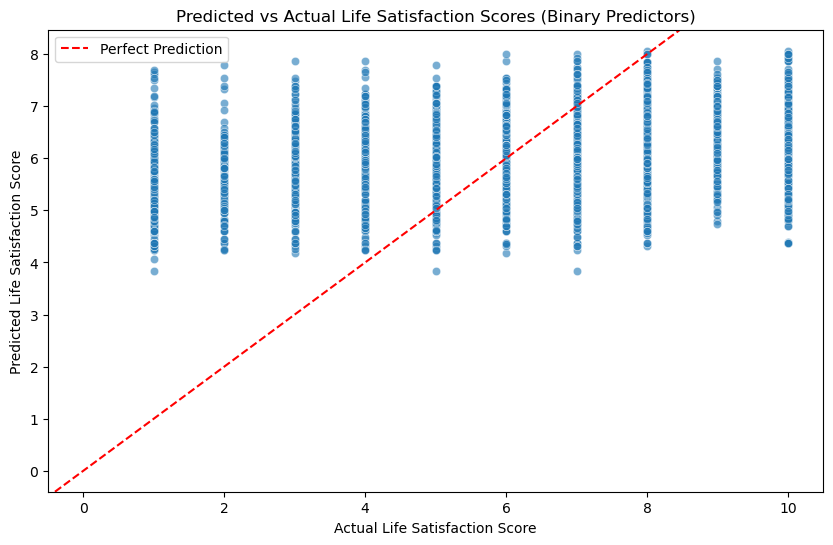

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update the correct file path
dataset = pd.read_csv(file_path, low_memory=False)

# Define dependent variable and community engagement predictors
dependent_variable = "WELLNESS_life_satisfaction"
community_engagement_predictors = [
    "CONNECTION_meaningful_interactions",
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_walk_p3m",
    "CONNECTION_activities_group_video_chat_p3m"
]

# Filter dataset for valid rows
community_satisfaction_data = dataset[[dependent_variable] + community_engagement_predictors].dropna()

# Convert categorical predictors into binary variables using one-hot encoding
community_satisfaction_encoded = pd.get_dummies(
    community_satisfaction_data, 
    columns=community_engagement_predictors, 
    drop_first=True
)

# Define input (X) and output (y) variables after encoding
X_community_binary = community_satisfaction_encoded.drop(columns=[dependent_variable])
y_community_binary = community_satisfaction_encoded[dependent_variable]

# Fit a linear regression model
reg_model_community_binary = LinearRegression()
reg_model_community_binary.fit(X_community_binary, y_community_binary)

# Calculate R-squared value
r_squared_community_binary = reg_model_community_binary.score(X_community_binary, y_community_binary)
print(f"R-squared value: {r_squared_community_binary:.3f}")

# Extract regression coefficients
coefficients_community_binary = pd.DataFrame({
    "Feature": X_community_binary.columns,
    "Coefficient": reg_model_community_binary.coef_
})
print("Intercept:", reg_model_community_binary.intercept_)
print(coefficients_community_binary)

# Scatter plot of predicted vs actual life satisfaction scores
y_pred_community_binary = reg_model_community_binary.predict(X_community_binary)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_community_binary, y=y_pred_community_binary, alpha=0.6)
plt.title('Predicted vs Actual Life Satisfaction Scores (Binary Predictors)')
plt.xlabel('Actual Life Satisfaction Score')
plt.ylabel('Predicted Life Satisfaction Score')
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Prediction")
plt.legend()
plt.show()


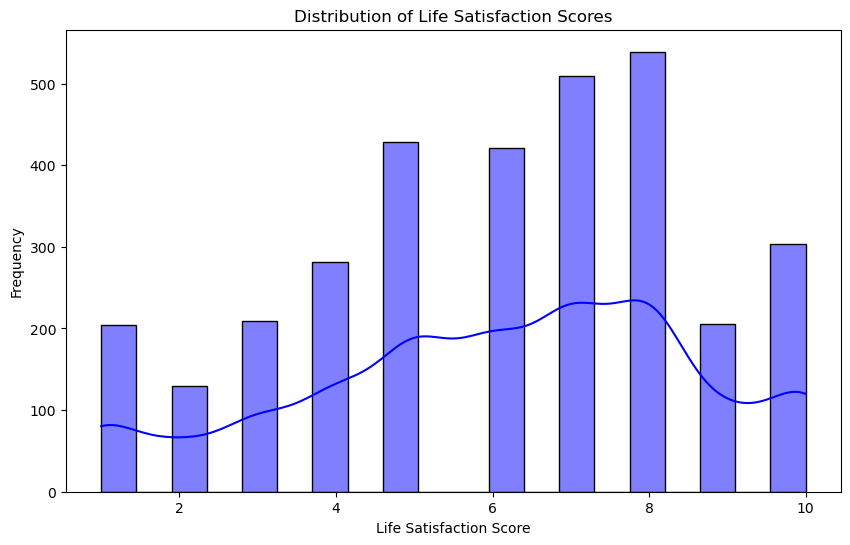

/tmp/ipykernel_70/999278736.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/tmp/ipykernel_70/999278736.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


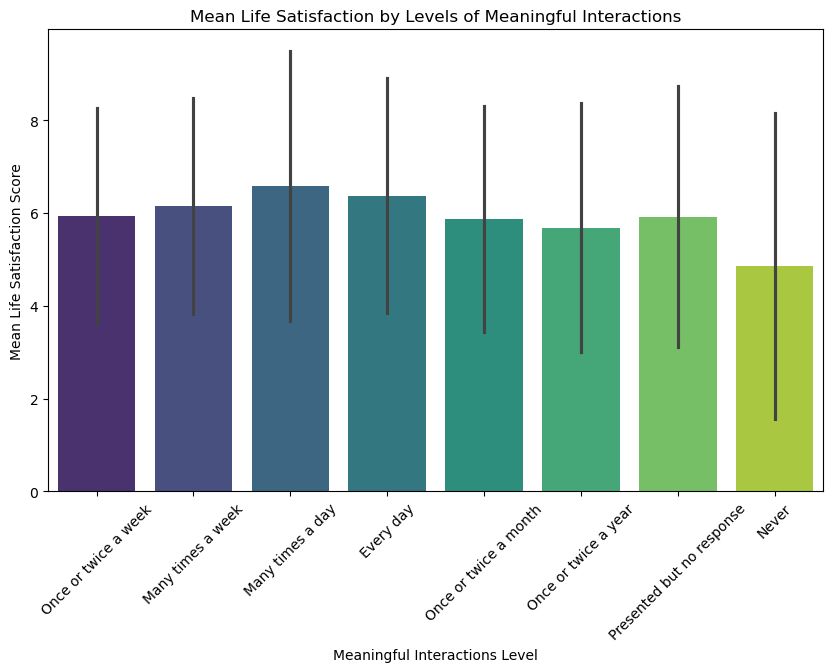

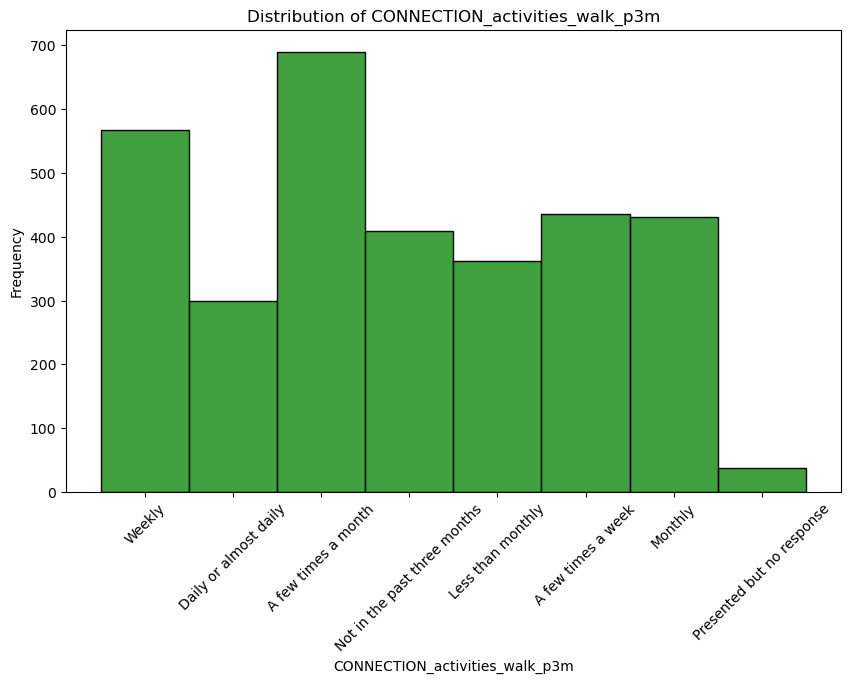

In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update the correct file path
dataset = pd.read_csv(file_path, low_memory=False)

# Define dependent variable and community engagement predictors
dependent_variable = "WELLNESS_life_satisfaction"
community_engagement_predictors = [
    "CONNECTION_meaningful_interactions",
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_walk_p3m",
    "CONNECTION_activities_group_video_chat_p3m"
]

# Filter dataset for valid rows
community_satisfaction_data = dataset[[dependent_variable] + community_engagement_predictors].dropna()

# Histogram of life satisfaction scores
plt.figure(figsize=(10, 6))
sns.histplot(data=community_satisfaction_data, x=dependent_variable, kde=True, bins=20, color="blue")
plt.title("Distribution of Life Satisfaction Scores")
plt.xlabel("Life Satisfaction Score")
plt.ylabel("Frequency")
plt.show()

# Bar plot of mean life satisfaction by levels of meaningful interactions
if "CONNECTION_meaningful_interactions" in community_engagement_predictors:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="CONNECTION_meaningful_interactions",
        y=dependent_variable,
        data=community_satisfaction_data,
        estimator="mean",
        ci="sd",
        palette="viridis"
    )
    plt.title("Mean Life Satisfaction by Levels of Meaningful Interactions")
    plt.xlabel("Meaningful Interactions Level")
    plt.ylabel("Mean Life Satisfaction Score")
    plt.xticks(rotation=45)
    plt.show()

# Histogram for a specific community engagement predictor
predictor = "CONNECTION_activities_walk_p3m"
if predictor in community_engagement_predictors:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=community_satisfaction_data, x=predictor, bins=15, color="green")
    plt.title(f"Distribution of {predictor}")
    plt.xlabel(predictor)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()


/tmp/ipykernel_70/4125834159.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


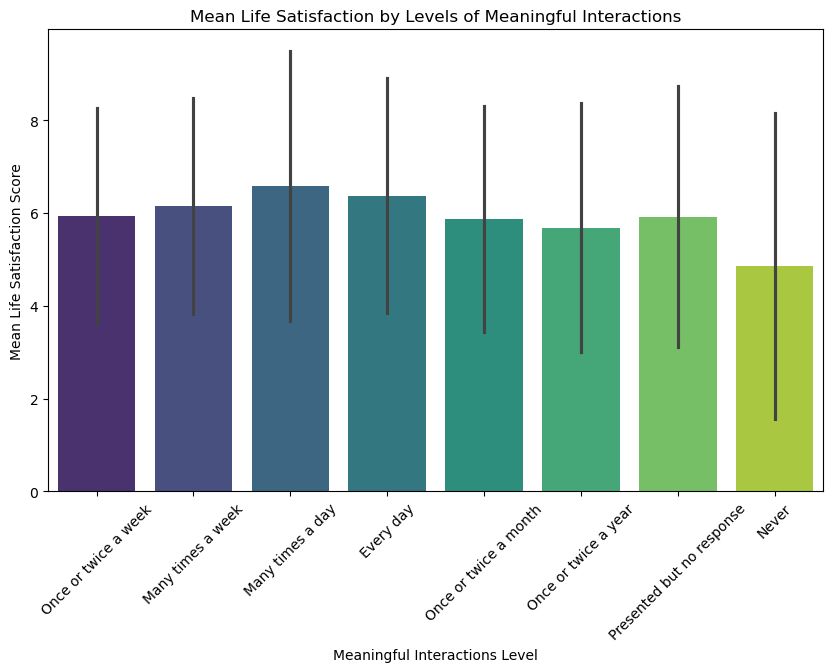

In [28]:
# Bar plot of mean life satisfaction by levels of meaningful interactions
if "CONNECTION_meaningful_interactions" in community_engagement_predictors:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="CONNECTION_meaningful_interactions",
        y=dependent_variable,
        data=community_satisfaction_data,
        estimator="mean",
        errorbar="sd",  # Replace 'ci' with 'errorbar'
        palette="viridis"
    )
    plt.title("Mean Life Satisfaction by Levels of Meaningful Interactions")
    plt.xlabel("Meaningful Interactions Level")
    plt.ylabel("Mean Life Satisfaction Score")
    plt.xticks(rotation=45)
    plt.show()

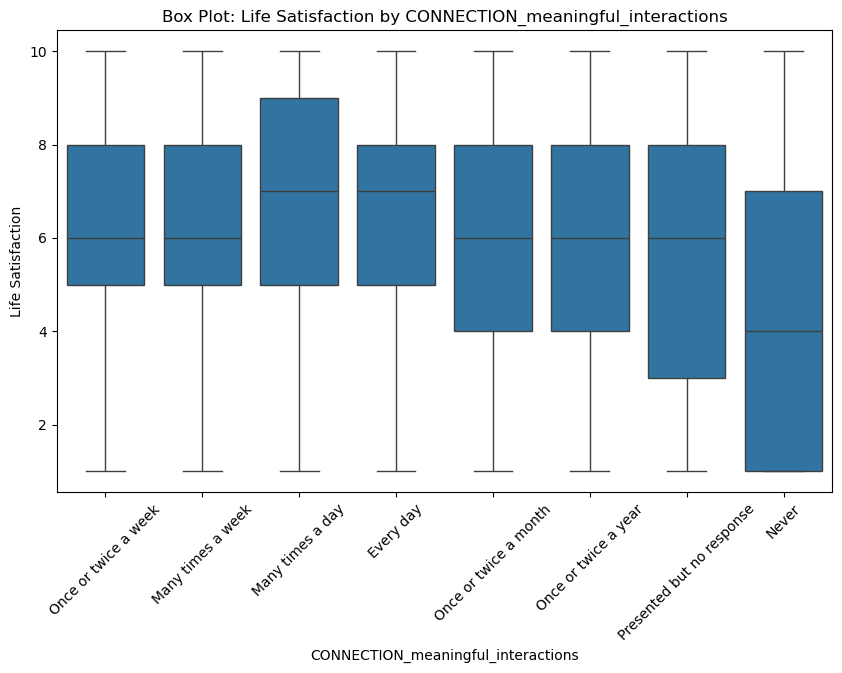

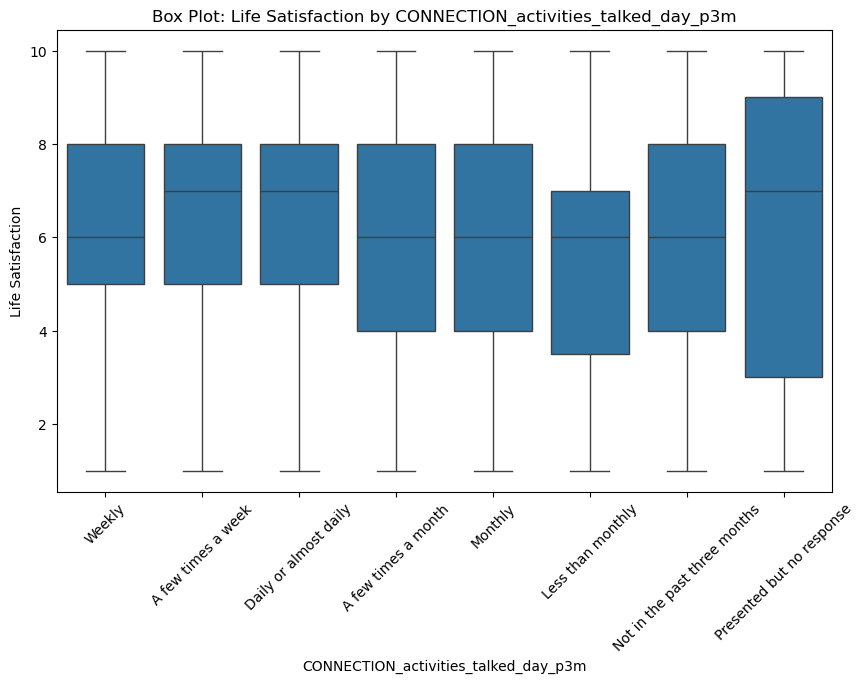

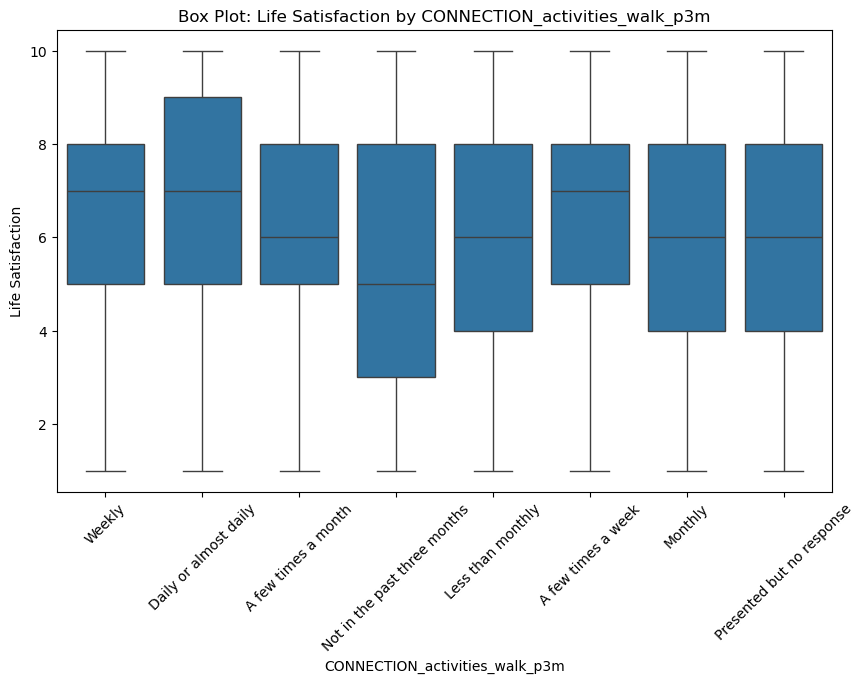

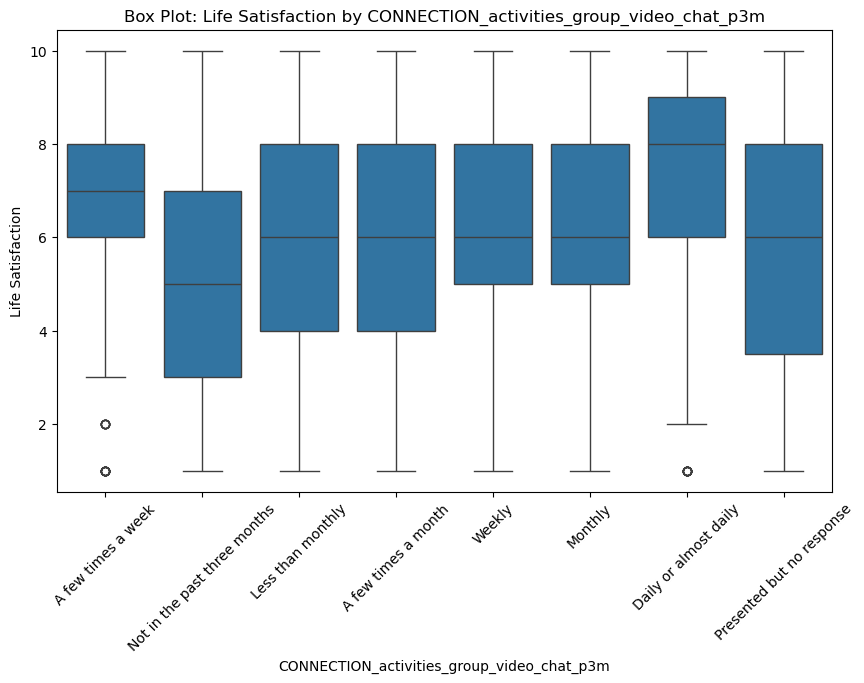

In [34]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update the correct file path
dataset = pd.read_csv(file_path, low_memory=False)

# Define dependent variable and community engagement predictors
dependent_variable = "WELLNESS_life_satisfaction"
community_engagement_predictors = [
    "CONNECTION_meaningful_interactions",
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_walk_p3m",
    "CONNECTION_activities_group_video_chat_p3m"
]

# Filter dataset for valid rows
community_satisfaction_data = dataset[[dependent_variable] + community_engagement_predictors].dropna()

# Generate scatter plots for continuous predictors and box plots for categorical predictors
# Generate scatter plots for continuous predictors and box plots for categorical predictors
for predictor in community_engagement_predictors:
    plt.figure(figsize=(10, 6))
    if community_satisfaction_data[predictor].dtype in ['float64', 'int64']:
        # Scatter plot with regression line for continuous predictors
        sns.scatterplot(
            x=predictor,
            y=dependent_variable,
            data=community_satisfaction_data
        )
        sns.regplot(
            x=predictor,
            y=dependent_variable,
            data=community_satisfaction_data,
            scatter=False,
            color="red"
        )
        plt.title(f"Scatter Plot: Life Satisfaction vs {predictor}")
        plt.xlabel(predictor)
        plt.ylabel("Life Satisfaction")
    else:
        # Box plot for categorical predictors without palette
        sns.boxplot(
            x=predictor,
            y=dependent_variable,
            data=community_satisfaction_data
        )
        plt.title(f"Box Plot: Life Satisfaction by {predictor}")
        plt.xlabel(predictor)
        plt.ylabel("Life Satisfaction")
        plt.xticks(rotation=45)
    plt.show()

